In [80]:
import numpy as np
import tables as PyT
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
f=pd.read_csv('golf_data.csv',parse_dates={'dt':[0]})

In [178]:
NumberOfRounds=f.shape[0]/9
# slopes/ratings (divided by 2 for 18-hole courses)
# Hillandale slope = 112, rating = 64.5/2
# Occoneechee slope = 124, rating 68.6/2
# Twin Lakes slope = 113, rating = 34.2
ratings = {'Hillandale Golf Course': 64.5/2, 'Occoneechee Golf Club': 68.6/2, 'Twin Lakes Golf Course': 34.2}
slopes  = {'Hillandale Golf Course': 112,    'Occoneechee Golf Club': 124, 'Twin Lakes Golf Course': 113}


Courses=np.flipud(np.reshape(f.Course,(NumberOfRounds,9)))
Courses=Courses[:,0]
#print set(Courses)

CourseRatings=np.ones([NumberOfRounds,])
for i in range(0,Courses.shape[0]):
    CourseRatings[i]=ratings[Courses[i]]

In [179]:
PerHoleScores=np.flipud(np.reshape(f.Score,(NumberOfRounds,9)))
RoundScores=np.sum(PerHoleScores,axis=1)
t=np.flipud(np.reshape(f.dt,(NumberOfRounds,9)))
dates=t[:,0]

In [180]:
regression = np.polyfit(range(0,NumberOfRounds), RoundScores, 1)
r_x, r_y = zip(*((i, i*regression[0] + regression[1]) for i in range(NumberOfRounds)))
regression2 = np.polyfit(range(1,NumberOfRounds), RoundScores[1:], 1)
r2_x, r2_y = zip(*((i, i*regression2[0] + regression2[1]) for i in range(NumberOfRounds)))

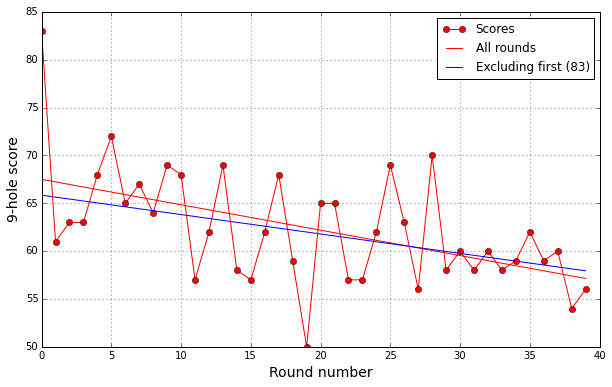

In [181]:
plt.figure(figsize=(10,6))
plt.plot(RoundScores,'ro-')
plt.ylabel("9-hole score",fontsize=14)
plt.xlabel("Round number",fontsize=14)
plt.grid(True)
plt.plot(r_x, r_y, color="red")
plt.plot(r2_x, r2_y, color="blue")
lstr=[]
lstr.append('Scores')
lstr.append('All rounds')
lstr.append('Excluding first (83)')
plt.legend(lstr, fontsize=12);

In [182]:
#plt.hist(RoundScores)

In [183]:
# adjusted gross score
# max of 9 on any hole
PerHoleScores_adj=np.copy(PerHoleScores);
PerHoleScores_adj[PerHoleScores_adj>9]=9
RoundScores_adj=np.sum(PerHoleScores_adj,axis=1)
regression_adj = np.polyfit(range(0,NumberOfRounds), RoundScores_adj, 1)
r_x_adj, r_y_adj = zip(*((i, i*regression_adj[0] + regression_adj[1]) for i in range(NumberOfRounds)))

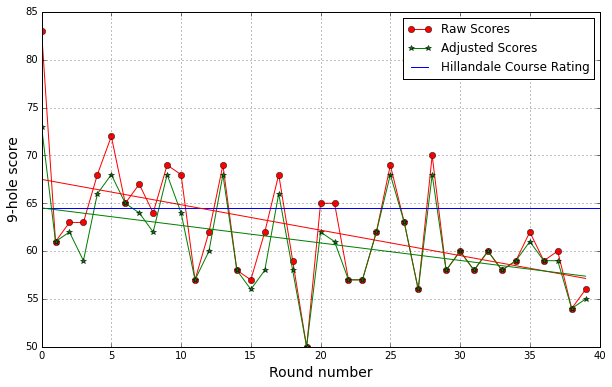

In [184]:
plt.figure(figsize=(10,6))
plt.plot(RoundScores,'ro-')
plt.plot(RoundScores_adj,'g*-')
plt.plot(64.5*np.ones([NumberOfRounds+1,1]),'b-')
plt.ylabel("9-hole score",fontsize=14)
plt.xlabel("Round number",fontsize=14)
plt.grid(True)
plt.plot(r_x, r_y, color="red")
plt.plot(r_x_adj, r_y_adj, color="green")
lstr=[]
lstr.append('Raw Scores')
lstr.append('Adjusted Scores')
lstr.append('Hillandale Course Rating')
#lstr.append('Excluding first (83)')
plt.legend(lstr, fontsize=12);

In [185]:
## Handicap differential = (Adjusted Gross Score - Course Rating) x 113 ÷ Slope Rating
## https://www.golfnow.com/courses/1033123-hillandale-golf-course-details

hd=(RoundScores_adj-CourseRatings)*113/112
# sort hd, and take 10 best
hd=np.sort(hd)
hd=hd[-10:-1]
#hd=np.trunc(hd*10)/10

In [186]:
ahd=np.mean(hd)
print ahd

34.3764384921


In [187]:
HandiCapIndex=np.trunc(.96*ahd*10)/10

In [188]:
# hillandale hc
print 'Hillandale HC = ' + str(int(np.round(HandiCapIndex*slopes['Hillandale Golf Course']/113)))
print 'Occoneechee HC = ' + str(int(np.round(HandiCapIndex*slopes['Occoneechee Golf Club']/113)))
print 'Twin Lakes HC = ' + str(int(np.round(HandiCapIndex*slopes['Twin Lakes Golf Course']/113)))

Hillandale HC = 33
Occoneechee HC = 36
Twin Lakes HC = 33
